In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
print(tf.version.VERSION)

2.1.0


In [4]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# cd '/content/drive/My Drive/Colab Notebooks'

In [8]:
pwd

'/home/pi/Share/jupyter/kaggle/dogs_cats'

In [9]:
home_folder = '/home/pi/Share/jupyter/kaggle/dogs_cats'

In [10]:
ls -al

total 1464
drwxr-xr-x 5 pi pi   4096 May 11 15:59 ./
drwxr-xr-x 4 pi pi   4096 May 10 20:10 ../
drwxr-xr-x 2 pi pi   4096 May 11 15:57 .ipynb_checkpoints/
-rw-r--r-- 1 pi pi 307404 May 10 20:22 predict_dog_cat_20200510.ipynb
-rw-r--r-- 1 pi pi  14134 May 11 15:59 predict_dog_cat.ipynb
-rw-r--r-- 1 pi pi  88903 Dec 11 04:17 sampleSubmission.csv
drwxr-xr-x 2 pi pi 282624 May 10 15:39 test/
drwxr-xr-x 4 pi pi 786432 May 10 19:57 train/


In [0]:
# !unzip kaggle_dogs_cats.zip

In [0]:
home_folder

In [0]:
os.listdir(home_folder)

In [13]:
train_path = '/home/pi/Share/jupyter/kaggle/dogs_cats/train/'
train_path_0 = train_path + '/0/'
train_path_1 = train_path + '/1/'


In [14]:
train_files_0 = os.listdir(train_path_0)
train_files_1 = os.listdir(train_path_1)

In [15]:
pic_0 = plt.imread(train_path_0 + train_files_0[0])

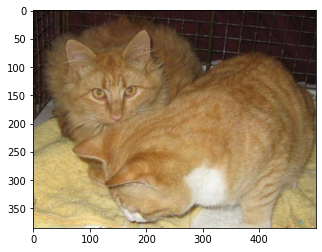

In [16]:
plt.imshow(pic_0)

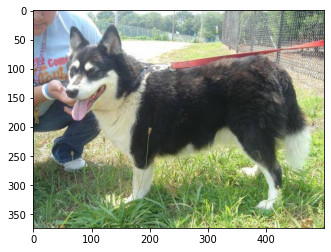

In [17]:
pic_1 = plt.imread(train_path_1 + train_files_1[0]) 
plt.imshow(pic_1)

In [18]:
l = len(train_files_0)
for i in range(l):
    train_files_0[i] = train_path_0+train_files_0[i]

l = len(train_files_1)
for i in range(l):
    train_files_1[i] = train_path_1+train_files_1[i]



In [19]:
all_files = train_files_0 + train_files_1

In [20]:
len(all_files)

25000

In [22]:
h = [] #height of the image
w = [] #width of the image
cnt = 0
for f in all_files:
    cnt +=1 
    if cnt%1000 == 0: 
        print(cnt)
    img = plt.imread(f)
    w.append(img.shape[0])
    h.append(img.shape[1])


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [23]:
np.mean(h)

404.09904

In [24]:
np.mean(w)

360.47808

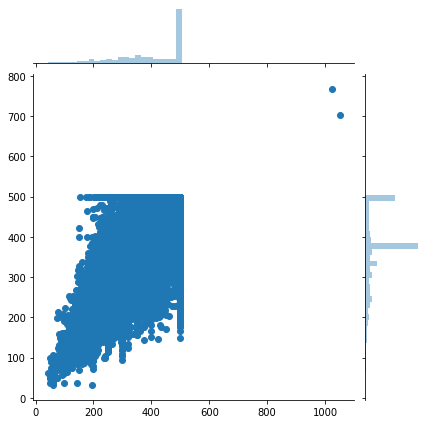

In [25]:
sns.jointplot(h,w);

In [40]:
#image_shape = (404,360,3)
image_shape = (100,100,3)

In [41]:
image_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3 )
# ImageDataGenerator(rotation_range= 20,  width_shift_range=0.2, height_shift_range= 0.2, 
#                                shear_range=0.5, zoom_range= 0.2, horizontal_flip=True, vertical_flip=True, 
#                                fill_mode = 'nearest'
#                                , validation_split=0.9)

In [42]:
image_gen.flow_from_directory(train_path)

Found 25000 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2) ))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu' ))
# model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2166848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [46]:
#early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [47]:
batch_size = 16

In [48]:
train_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size = image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              subset="training"                                               
                                             )

Found 17500 images belonging to 2 classes.


In [49]:
validation_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size = image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              subset="validation",
                                              shuffle=False                                                   
                                             )

Found 7500 images belonging to 2 classes.


In [50]:
validation_img_gen.class_indices

{'0': 0, '1': 1}

In [51]:
train_img_gen.class_indices

{'0': 0, '1': 1}

In [52]:
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

In [53]:
from tensorflow.keras.models import load_model
model.save('cats_dogs.h5')

In [55]:
train_img_gen.samples

17500

In [56]:
# with tf.device('/device:GPU:0'):
model.fit(train_img_gen,
          epochs = 20, 
          steps_per_epoch = len(train_img_gen) // batch_size , 
          validation_data=validation_img_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 68 steps, validate for 469 steps
Epoch 1/20
68/68 [==============================] - 158s 2s/step - loss: 0.6214 - accuracy: 0.6682 - val_loss: 0.5958 - val_accuracy: 0.6724
Epoch 2/20
68/68 [==============================] - 172s 3s/step - loss: 0.5955 - accuracy: 0.6921 - val_loss: 0.5775 - val_accuracy: 0.7065
Epoch 3/20
68/68 [==============================] - 177s 3s/step - loss: 0.5946 - accuracy: 0.6866 - val_loss: 0.5916 - val_accuracy: 0.6880
Epoch 4/20
68/68 [==============================] - 178s 3s/step - loss: 0.6167 - accuracy: 0.6627 - val_loss: 0.5688 - val_accuracy: 0.6980
Epoch 5/20
68/68 [==============================] - 178s 3s/step - loss: 0.5749 - accuracy: 0.7086 - val_loss: 0.5941 - val_accuracy: 0.6955
Epoch 6/20
68/68 [==============================] - 179s 3s/step - loss: 0.5829 - accuracy: 0.6994 - val_loss: 0.5643 - val_accuracy: 0.7035
Epoch 7/20
68/68 [==============================] - 180s 3s/s

In [62]:
model.save('cats_dogs_model.h5')

In [60]:
metrics = pd.DataFrame( model.history.history)

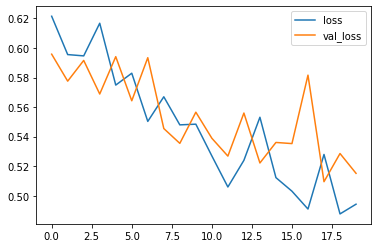

In [64]:
metrics[['loss','val_loss']].plot()

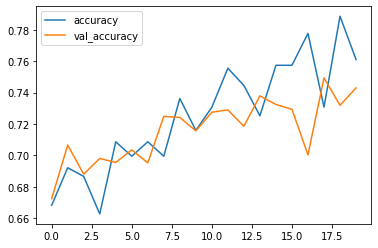

In [65]:
metrics[['accuracy','val_accuracy']].plot()

In [66]:
ls -al

total 36120
drwxr-xr-x 5 pi pi     4096 May 11 17:53 ./
drwxr-xr-x 4 pi pi     4096 May 10 20:10 ../
-rw-r--r-- 1 pi pi  8767872 May 11 16:34 cats_dogs.h5
-rw-r--r-- 1 pi pi 26277016 May 11 17:51 cats_dogs_model.h5
drwxr-xr-x 2 pi pi     4096 May 11 15:57 .ipynb_checkpoints/
-rw-r--r-- 1 pi pi   307404 May 10 20:22 predict_dog_cat_20200510.ipynb
-rw-r--r-- 1 pi pi   450815 May 11 17:53 predict_dog_cat.ipynb
-rw-r--r-- 1 pi pi    88903 Dec 11 04:17 sampleSubmission.csv
drwxr-xr-x 2 pi pi   282624 May 10 15:39 test/
drwxr-xr-x 4 pi pi   786432 May 10 19:57 train/


In [69]:
pwd

'/home/pi/Share/jupyter/kaggle/dogs_cats'

In [70]:
test_path = '/home/pi/Share/jupyter/kaggle/dogs_cats/test'

In [76]:
test_files = os.listdir(test_path)

In [77]:
l = len(test_files)
for i in range(l):
    test_files[i] = test_path + '/' + test_files[i]

In [79]:
from tensorflow.keras.preprocessing import image

In [111]:
for f in test_files:
    my_image = image.load_img(f, target_size=image_shape)
    my_img_arr = image.img_to_array(my_image)
    my_img_arr = np.expand_dims(my_img_arr, axis = 0)
    print(f.split("/")[-1].split(".")[0], "," ,"1" if model.predict(my_img_arr)[0]==1.0 else 0 )

1489 , 1
9190 , 1
3087 , 1
1721 , 1
5907 , 1
5635 , 1
6094 , 1
3682 , 0
9187 , 1
11126 , 1
4117 , 0
10127 , 1
4975 , 1
2003 , 1
5885 , 1
3498 , 1
4538 , 1
5488 , 0
10292 , 0
8356 , 0
9558 , 1
11605 , 0
1205 , 1
4747 , 1
2272 , 1
11064 , 1
4319 , 1
4599 , 1
4859 , 0
10338 , 1
2062 , 1
5919 , 0
1016 , 1
5965 , 1
4123 , 0
6054 , 1
259 , 1
2467 , 1
3882 , 1
7017 , 1
6119 , 1
11349 , 1
9478 , 1
7370 , 1
6699 , 1
8501 , 1
7683 , 1
10070 , 1
9012 , 1
9026 , 1
1072 , 1
2697 , 1
11502 , 1
12034 , 0
1406 , 0
478 , 0
3488 , 1
8147 , 1
3653 , 1
3855 , 1
5083 , 1
12051 , 1
5399 , 1
471 , 1
382 , 0
6696 , 1
4899 , 1
11166 , 0
5900 , 0
2016 , 1
2795 , 1
2045 , 1
9802 , 1
5506 , 1
5697 , 1
9397 , 1
2067 , 1
192 , 1
1928 , 1
3838 , 1
3425 , 1
1914 , 1
344 , 1
4307 , 0
5472 , 0
1119 , 0
6368 , 1
1579 , 0
788 , 1
9542 , 1
1142 , 1
7816 , 1
10174 , 1
278 , 0
3710 , 1
7940 , 0
2950 , 1
10708 , 1
9113 , 0
9072 , 1
12416 , 1
4118 , 0
6364 , 0
9681 , 1
1276 , 1
8826 , 0
8929 , 0
9893 , 0
2619 , 0
5111 , 1
655